<a href="https://www.kaggle.com/code/milessingmi/notebook-mi?scriptVersionId=228889306" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


trial run with medical dataset
import dataset 

In [2]:
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

data_dir = '/kaggle/input/medical-mnist'
classes = ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']



transfer dataset to dataframe 

In [3]:
image_paths = []
labels = []
for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, img_name))
        labels.append(class_idx)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
print(f"Total images: {len(df)}")
df.head()

Total images: 58954


,filepath,label
0,/kaggle/input/medical-mnist/AbdomenCT/003646.jpeg,0
1,/kaggle/input/medical-mnist/AbdomenCT/003998.jpeg,0
2,/kaggle/input/medical-mnist/AbdomenCT/001273.jpeg,0
3,/kaggle/input/medical-mnist/AbdomenCT/001609.jpeg,0
4,/kaggle/input/medical-mnist/AbdomenCT/007646.jpeg,0


visulization for this data

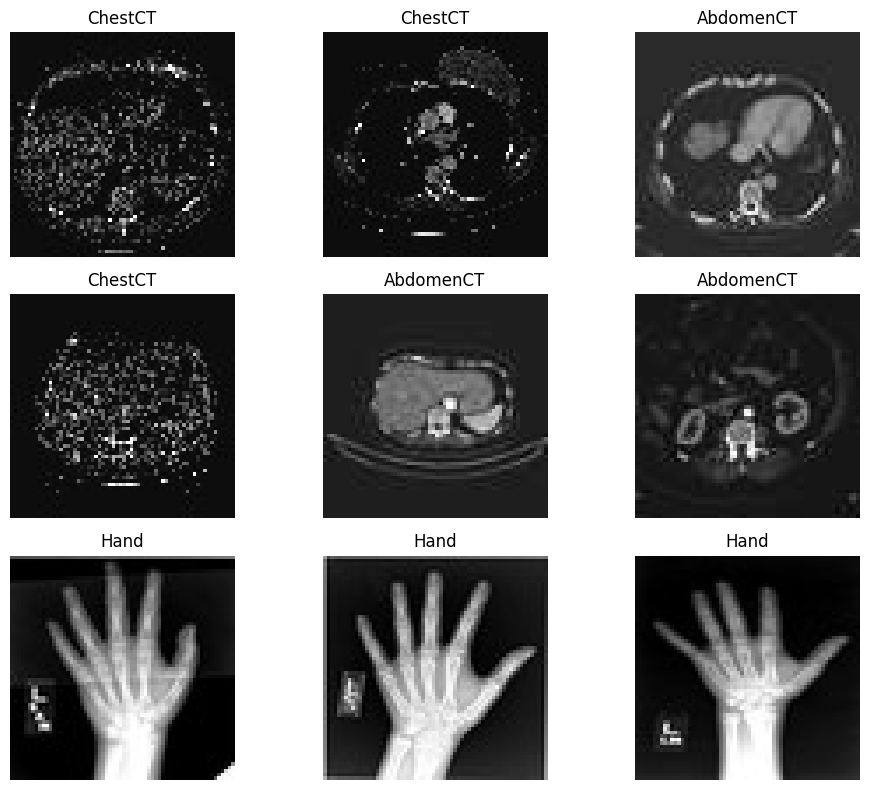

In [4]:
plt.figure(figsize=(10,8))
for idx, (_, row) in enumerate(df.sample(9).iterrows()):
    img = plt.imread(row['filepath'])
    plt.subplot(3,3,idx+1)
    plt.imshow(img, cmap='gray')
    plt.title(classes[row['label']])
    plt.axis('off')
plt.tight_layout()
plt.show()

ann mode 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input


predict

In [6]:
X = np.array([plt.imread(f).flatten() for f in df['filepath']]) / 255.0
y = to_categorical(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape', y_test.shape)

X_train shape: (47163, 4096)
X_test.shape: (11791, 4096)
y_train.shape: (47163, 6)
y_test.shape (11791, 6)


ann model setup

In [7]:
model = Sequential([
    Input(shape=(4096,)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

traning the model

In [8]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8416 - loss: 0.5175 - val_accuracy: 0.9867 - val_loss: 0.0499
Epoch 2/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0561 - val_accuracy: 0.9916 - val_loss: 0.0310
Epoch 3/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9828 - loss: 0.0533 - val_accuracy: 0.9963 - val_loss: 0.0178
Epoch 4/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0363 - val_accuracy: 0.9955 - val_loss: 0.0228
Epoch 5/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0298 - val_accuracy: 0.9970 - val_loss: 0.0157
Epoch 6/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9937 - val_loss: 0.0320
Epoch 7/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0370 - val_accuracy: 0.9900 - val_loss: 0.0310
Epoch 8/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0285 - val_accuracy: 0

visullazation

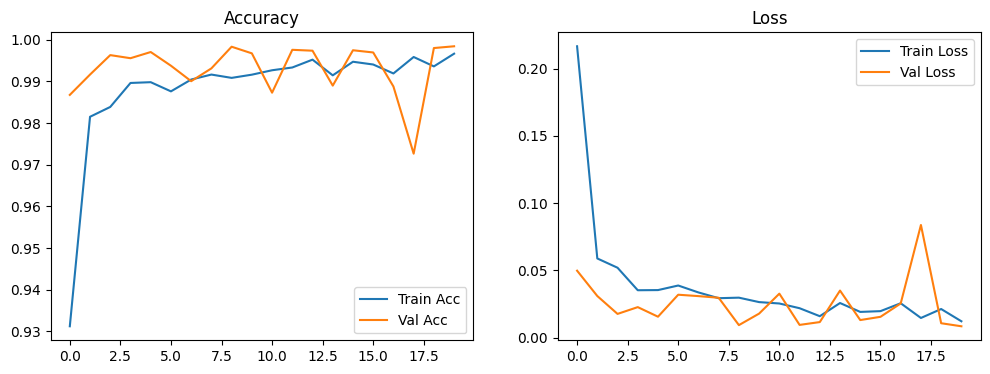

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

evaluate model

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('test loss is ', test_loss)
print('test acc  is ', test_acc)

test loss is  0.011037214659154415
test acc  is  0.998134195804596


visullaziation for training and test data 

In [11]:

plt.figure(figsize=(12,5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

acc and loss visullazation 

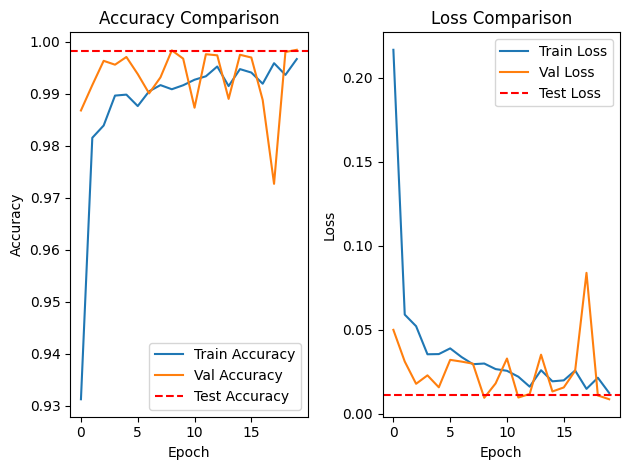

In [12]:
# acc parse
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# loss parse
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

trial run the model to predict a image  

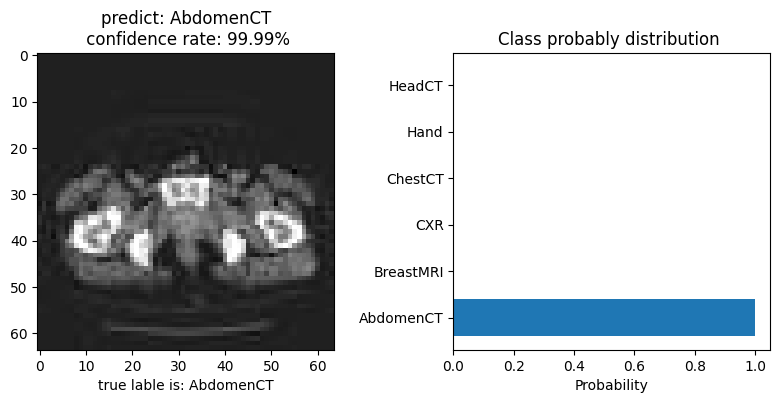

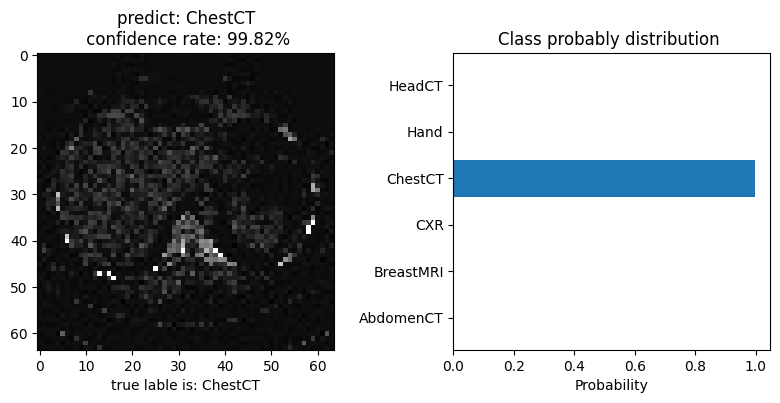

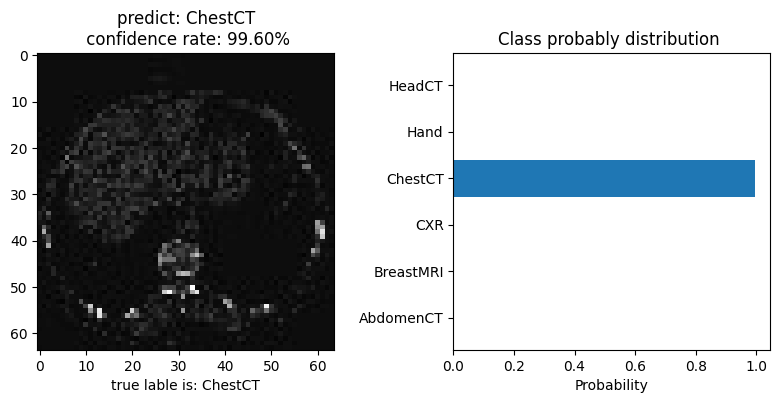

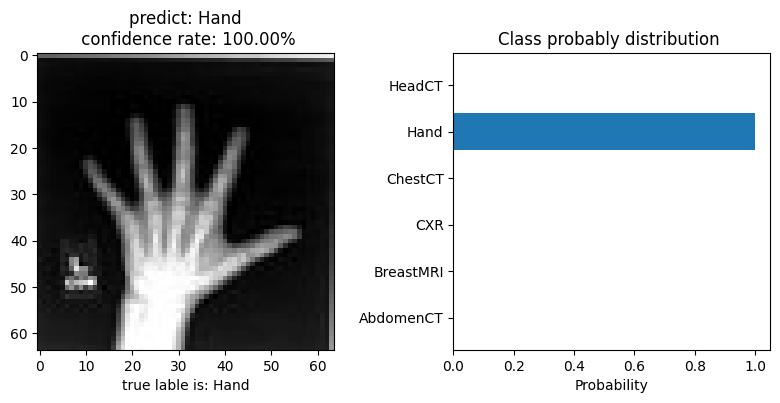

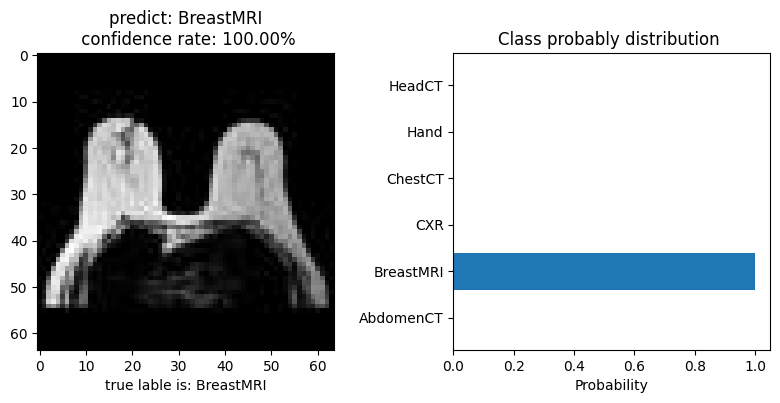

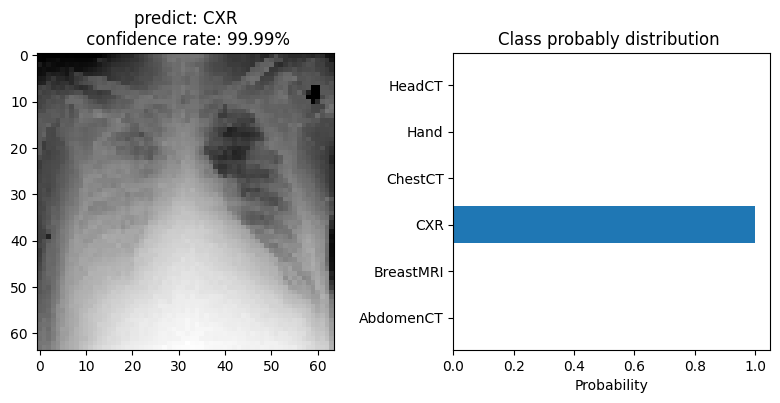

In [13]:
import random
from tensorflow.keras.preprocessing import image

def predict_single_image(img_path, true_label=None):
    
    # load image 
    img = image.load_img(img_path, color_mode='grayscale', target_size=(64,64))
    # preprocessing image
    img_array = image.img_to_array(img).reshape(1, 64*64) / 255.0
    
    # predict
    predictions = model.predict(img_array, verbose=0)
    predicted_proba = np.max(predictions)
    predicted_class = np.argmax(predictions)
    
    # visullazation result 
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(f"predict: {classes[predicted_class]}\n confidence rate: {predicted_proba:.2%}")
    
    if true_label is not None:
        plt.xlabel(f"true lable is: {classes[true_label]}")
    
    # show 
    plt.subplot(1,2,2)
    plt.barh(classes, predictions[0])
    plt.title('Class probably distribution ')
    plt.xlabel('Probability')
    plt.tight_layout()
    plt.show()

# pick any 9 sample images for furter predict
sample = df.sample(5)
for _, row in sample.iterrows():
    predict_single_image(row['filepath'], true_label=row['label'])

# customized image predict
predict_single_image("/kaggle/input/covidx-cxr2/test/02002619-3dea-4038-8d4d-458db30ed8de.png")